## Data analysis round 6 (13.04.2023)

In [1]:
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.ticker as ticker
import statsmodels.api as sm
import pylab
from lifelines import KaplanMeierFitter

In [2]:
# get data from CSV-file
df = pd.read_csv('data_sunspots.csv', sep=';')

date = pd.to_datetime(dict(year=df.year, month=df.month, day=df.day))

df.insert(0, "date", date, True)

In [3]:
#Adjustment of the dataframe to create a barplot

# Bis 1848 gibt es immer wieder fehlende Wert (mit "-1" gekennzeichnet).
# Damit die fehlende Werte keinen störenden Einfluss auf die Berechnungen haben,
# werden erst die Daten ab dem Jahr 1850 verwendet
df_spots = df[df.date > '1850-01-01'][['date','sunspots']]

df_spots.set_index('date', inplace=True)

### Statistical describtion

In [4]:
#statistical description of the column 'sunspots'
df_spots.sunspots.describe(include='all')

count    63245.000000
mean        83.131251
std         76.978280
min          0.000000
25%         21.000000
50%         63.000000
75%        128.000000
max        528.000000
Name: sunspots, dtype: float64

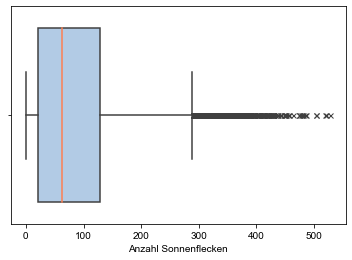

In [5]:
# Referenz: P002
# Hinweis: zweimal ausführen, sonst stimmt die Breite nicht
import seaborn as sns

sns.boxplot(
    data=df_spots, x="sunspots",
 #  notch=True,
 #   showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)

sns.set(rc={"figure.figsize":(14,4)}) # Ändere die Grösse des Plots
plt.xlabel("Anzahl Sonnenflecken") # Setze das Label der X-Achse
plt.show() # Zeige den Plot an

In [6]:
# Test (09.05.2023) ->  wo ist das 95. Perzentil?

from scipy.stats import percentileofscore

# Eine Sonneneruption der Klasse X45 entspricht dem Wert 0.0045
# hole das Perzentil des Wertes 0.0045
percentile = percentileofscore(df_spots['sunspots'], 279)

print("Der Wert 0.0045 liegt im " + str(percentile) + " Perzentil.")

Der Wert 0.0045 liegt im 97.87018736659024 Perzentil.


In [7]:
df_spots[df_spots['sunspots'] <= 9].count()

sunspots    9914
dtype: int64

------------------------------------------------------------------

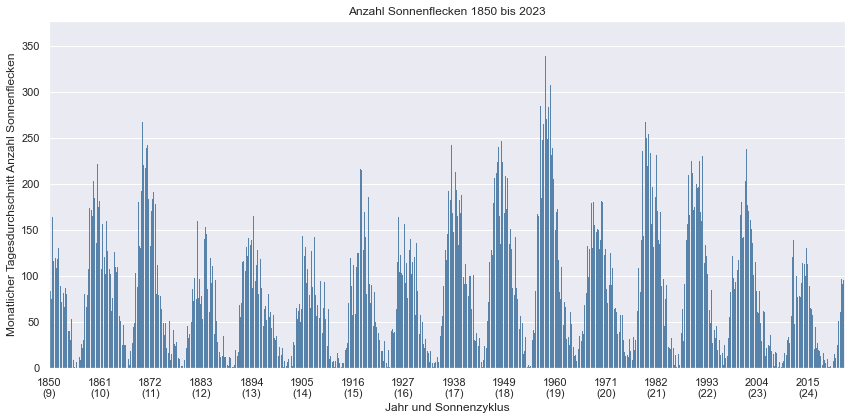

In [8]:
# Referenz: P001

# create a barplot to see what the data looks like
# Source to label the x-axis: https://stackoverflow.com/questions/30133280/pandas-bar-plot-changes-date-format

# take the mean of each month
df_spots_2 = df_spots.resample('M').mean()

# create a barplot with beautiful colors
plt.figure(figsize=(12, 6), tight_layout=True)

ax = sns.barplot(x=df_spots_2.index, y=df_spots_2['sunspots'], color='#4984b8', lw=0)

ticklabels = ['']*len(df_spots_2.index)
#ticklabels[::132] = [item.strftime('%Y') for item in df_spots_2.index[::132]]
#ticklabels[::132] = [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

ticklabels[::132] = ['1850\n(9)', '1861\n(10)', '1872\n(11)', '1883\n(12)', '1894\n(13)', '1905\n(14)',
                     '1916\n(15)', '1927\n(16)', '1938\n(17)', '1949\n(18)', '1960\n(19)', '1971\n(20)',
                     '1982\n(21)', '1993\n(22)', '2004\n(23)', '2015\n(24)']

ax.set(title='Anzahl Sonnenflecken 1850 bis 2023', xlabel='Jahr und Sonnenzyklus',
       ylabel='Monatlicher Tagesdurchschnitt Anzahl Sonnenflecken')

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

plt.show()

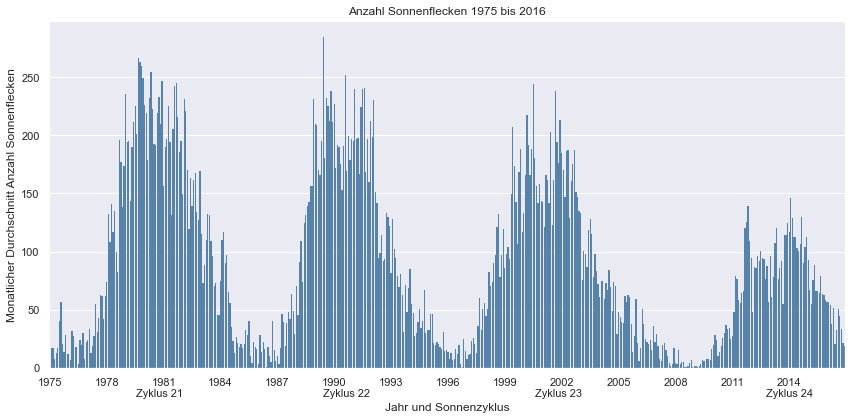

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# create a barplot to see what the data looks like
# Source to label the x-axis: https://stackoverflow.com/questions/30133280/pandas-bar-plot-changes-date-format

# take the mean of each month
df_spots_7 = df[(df.date > '1974-12-31') & (df.date < '2017-01-01')][['date','sunspots']]

df_spots_7.set_index('date', inplace=True)

df_spots_7 = df_spots_7.resample('M').mean()

# create a barplot with beautiful colors
plt.figure(figsize=(12, 6), tight_layout=True)

ax = sns.barplot(x=df_spots_7.index, y=df_spots_7['sunspots'], color='#4984b8', lw=0.)

ticklabels = ['']*len(df_spots_7.index)

ticklabels[::36] = ['1975', '1978', '1981\nZyklus 21   ', '1984', '1987',
                     '1990\n        Zyklus 22', '1993', '1996', '1999', '2002\nZyklus 23  ', '2005',
                     '2008', '2011', '2014\nZyklus 24']

ax.set(title='Anzahl Sonnenflecken 1975 bis 2016', xlabel='Jahr und Sonnenzyklus',
       ylabel='Monatlicher Durchschnitt Anzahl Sonnenflecken')

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

plt.show()

In [10]:
df_spots_2[df_spots_2.sunspots == df_spots_2.sunspots.max()]

,sunspots
date,
1957-10-31,359.387097


Bei dieser Abbildung ist der Höhepunkt im Jahr 1957 sehr auffällig. Im Jahr 1957 gab es mit 855 Sonnenflecken die höchste Anzahl Sonnenflecken seit Aufzeichnungsbeginn.


Höchste Anzahl Sonnenflecken pro Jahr: 855 Sonnenflecken im Jahr 1957
-> https://adsabs.harvard.edu/full/1958PASP...70..299C

Bisher aktivster Sonnenzyklus war der Sonnenzyklus 19 mit 201 Sonnenflecken (Was sagt die Zahl 201 konkret aus? 201 Sonnenflecken zur gleichen Zeit?): https://earthobservatory.nasa.gov/images/8405/the-dawn-of-a-new-solar-cycle


Auflistung der Rekord-Monate bezüglich Anzahl Sonnenflecken
-> https://www.sws.bom.gov.au/Educational/2/3/5

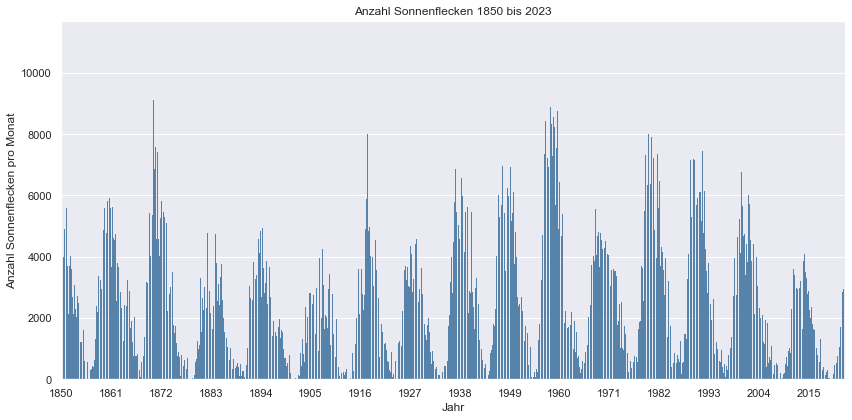

In [11]:
# take the sum of each month
df_spots_3 = df_spots.resample('M').sum()

# create a barplot with beautiful colors
plt.figure(figsize=(12, 6), tight_layout=True)

ax = sns.barplot(x=df_spots_3.index, y=df_spots_3['sunspots'], color='#4984b8', lw=0.)

ticklabels = ['']*len(df_spots_3.index)
ticklabels[::132] = [item.strftime('%Y') for item in df_spots_3.index[::132]]

ax.set(title='Anzahl Sonnenflecken 1850 bis 2023', xlabel='Jahr', ylabel='Anzahl Sonnenflecken pro Monat')

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

plt.show()

Übersicht der Seaborn-Farben:
https://www.biomooc.com/color/seabornColors.html

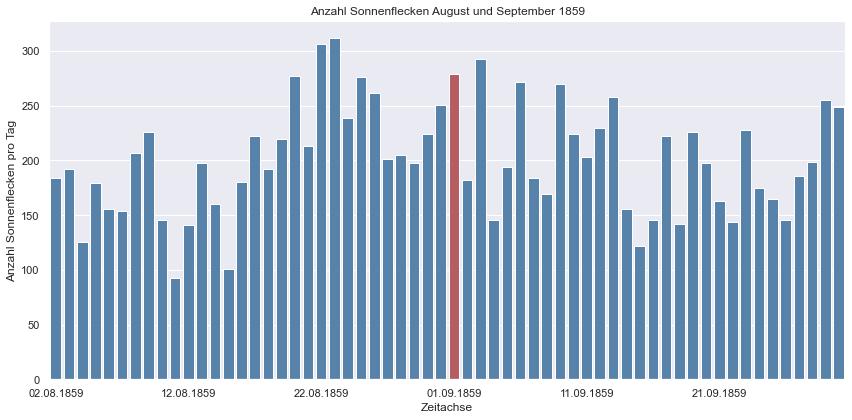

In [12]:
#Referenz: P004

from datetime import datetime

# Erstellung neues Dataframe für den Zeitraum 01.07.1859 - 01.10.1859
df_1859 = df[(df.date > '1859-08-01') & (df.date < '1859-10-01')][['date','sunspots']]
df_1859.set_index('date', inplace=True)


start = datetime.strptime('08-31-1859', '%m-%d-%Y')
end = datetime.strptime('09-02-1859', '%m-%d-%Y')

clrs = ['r' if x > start and x < end else '#4984b8' for x in df_1859.index]

# Erstellung eines Barplots für das Datafram df_1859
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=df_1859.index, y=df_1859['sunspots'], palette=clrs)

# Beschriftung der X-Achse anpassen
ticklabels = ['']*len(df_1859.index)
ticklabels[::10] = [item.strftime('%d.%m.%Y') for item in df_1859.index[::10]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

# Labels und Titel definieren
ax.set(title='Anzahl Sonnenflecken August und September 1859', xlabel='Zeitachse', ylabel='Anzahl Sonnenflecken pro Tag')

plt.show()

In [13]:
# Check the Carrington Event in the data

df_carrington = df[(df.date > '1859-08-31') & (df.date < '1859-09-02')][['date','sunspots']]

df_carrington

,date,sunspots
15218,1859-09-01,279


In [14]:
# Test (09.05.2023) ->  wo ist das 95. Perzentil?

from scipy.stats import percentileofscore

# Eine Sonneneruption der Klasse X45 entspricht dem Wert 0.0045
# hole das Perzentil des Wertes 0.0045
percentile = percentileofscore(df_spots['sunspots'], 279)

print("Der Wert 0.0045 liegt im " + str(percentile) + " Perzentil.")

Der Wert 0.0045 liegt im 97.87018736659024 Perzentil.


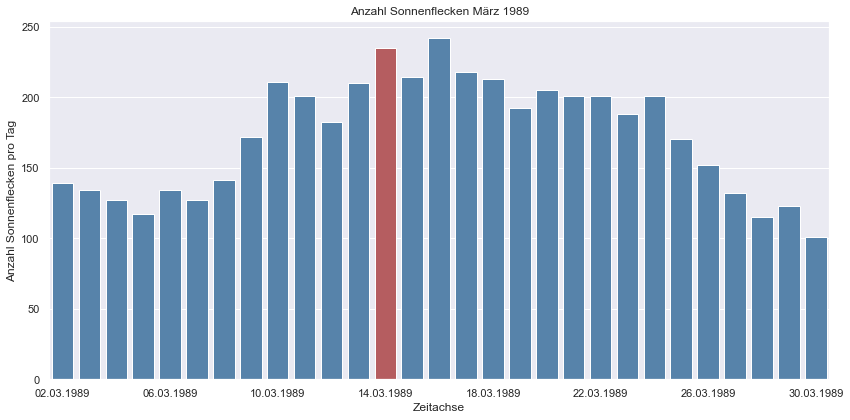

In [15]:
from datetime import datetime

# Erstellung neues Dataframe für den Zeitraum 01.07.1859 - 01.10.1859
df_1859 = df[(df.date > '1989-03-01') & (df.date < '1989-03-31')][['date','sunspots']]
df_1859.set_index('date', inplace=True)


start = datetime.strptime('03-13-1989', '%m-%d-%Y')
end = datetime.strptime('03-15-1989', '%m-%d-%Y')

clrs = ['r' if x > start and x < end else '#4984b8' for x in df_1859.index]

# Erstellung eines Barplots für das Datafram df_1859
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=df_1859.index, y=df_1859['sunspots'], palette=clrs)

# Beschriftung der X-Achse anpassen
ticklabels = ['']*len(df_1859.index)
ticklabels[::4] = [item.strftime('%d.%m.%Y') for item in df_1859.index[::4]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

# Labels und Titel definieren
ax.set(title='Anzahl Sonnenflecken März 1989', xlabel='Zeitachse', ylabel='Anzahl Sonnenflecken pro Tag')

plt.show()

In [16]:
# Check the blackout in Quebec in the data

df_quebec = df[(df.date > '1989-03-13') & (df.date < '1989-03-15')][['date','sunspots']]

df_quebec

,date,sunspots
62529,1989-03-14,235


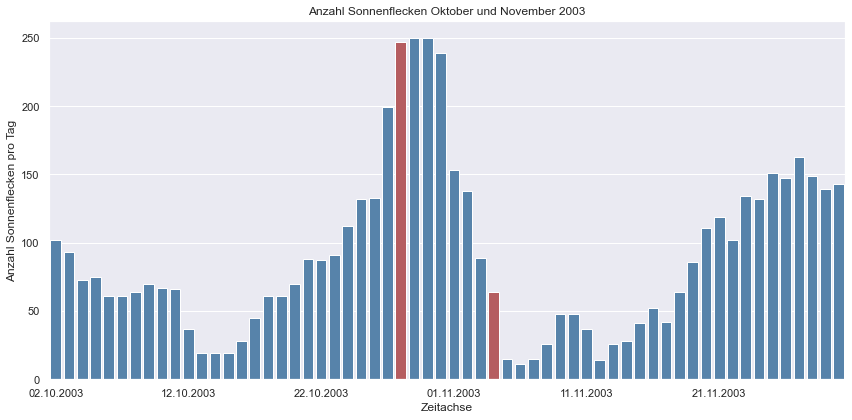

In [17]:
from datetime import datetime

# Erstellung neues Dataframe für den Zeitraum 01.07.1859 - 01.10.1859
df_1859 = df[(df.date > '2003-10-01') & (df.date < '2003-12-01')][['date','sunspots']]
df_1859.set_index('date', inplace=True)


#start = datetime.strptime('10-27-2003', '%m-%d-%Y')
#end = datetime.strptime('10-29-2003', '%m-%d-%Y')

date_1 = datetime.strptime('10-28-2003', '%m-%d-%Y')
date_2 = datetime.strptime('11-04-2003', '%m-%d-%Y')

clrs = ['r' if x == date_1 or x == date_2 else '#4984b8' for x in df_1859.index]

# Erstellung eines Barplots für das Datafram df_1859
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=df_1859.index, y=df_1859['sunspots'], palette=clrs)

# Beschriftung der X-Achse anpassen
ticklabels = ['']*len(df_1859.index)
ticklabels[::10] = [item.strftime('%d.%m.%Y') for item in df_1859.index[::10]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

# Labels und Titel definieren
ax.set(title='Anzahl Sonnenflecken Oktober und November 2003', xlabel='Zeitachse', ylabel='Anzahl Sonnenflecken pro Tag')

plt.show()

In [18]:
# Check the Halloween Storms on 4. November 2003

df_2003 = df[(df.date > '2003-10-27') & (df.date < '2003-11-05')][['date','sunspots']]

df_2003

,date,sunspots
67870,2003-10-28,247
67871,2003-10-29,250
67872,2003-10-30,250
67873,2003-10-31,239
67874,2003-11-01,153
67875,2003-11-02,138
67876,2003-11-03,89
67877,2003-11-04,64


In [19]:
# Test (09.05.2023) ->  wo ist das 95. Perzentil?

from scipy.stats import percentileofscore

# Eine Sonneneruption der Klasse X45 entspricht dem Wert 0.0045
# hole das Perzentil des Wertes 0.0045
percentile = percentileofscore(df_spots['sunspots'], 247)

print("Der Wert 0.0045 liegt im " + str(percentile) + " Perzentil.")

Der Wert 0.0045 liegt im 96.03367855166417 Perzentil.


In [20]:
# Check the Carrington-like Event which just missed us in 2012

df_2012 = df[(df.date > '2012-07-22') & (df.date < '2012-07-24')][['date','sunspots']]

df_2012

,date,sunspots
71061,2012-07-23,63


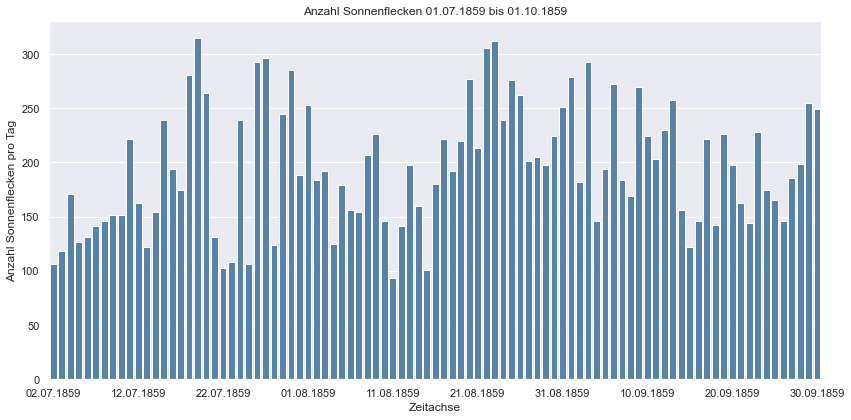

In [21]:
# Anzeigen der Daten rund um den Zeitpunkt des Carrington-Ereignisses
# Überraschenderweise waren die Anzahl Sonnenflecken zum Zeitpunkt des Carrington-Ereignisses (28.08- bis 4.09.1859)
# nicht aussergewöhnlich hoch.
# Kritische Hinterfragung: Sind die Anzahl Sonnenflecken wird die passenden Daten für diese Berechnung?

# Erstellung neues Dataframe für den Zeitraum 01.07.1859 - 01.10.1859
df_1859 = df[(df.date > '1859-07-01') & (df.date < '1859-10-01')][['date','sunspots']]
df_1859.set_index('date', inplace=True)

# Erstellung eines Barplots für das Datafram df_1859
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=df_1859.index, y=df_1859['sunspots'], color='#4984b8')

# Beschriftung der X-Achse anpassen
ticklabels = ['']*len(df_1859.index)
ticklabels[::10] = [item.strftime('%d.%m.%Y') for item in df_1859.index[::10]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

# Labels und Titel definieren
ax.set(title='Anzahl Sonnenflecken 01.07.1859 bis 01.10.1859', xlabel='Zeitachse', ylabel='Anzahl Sonnenflecken pro Tag')

plt.show()

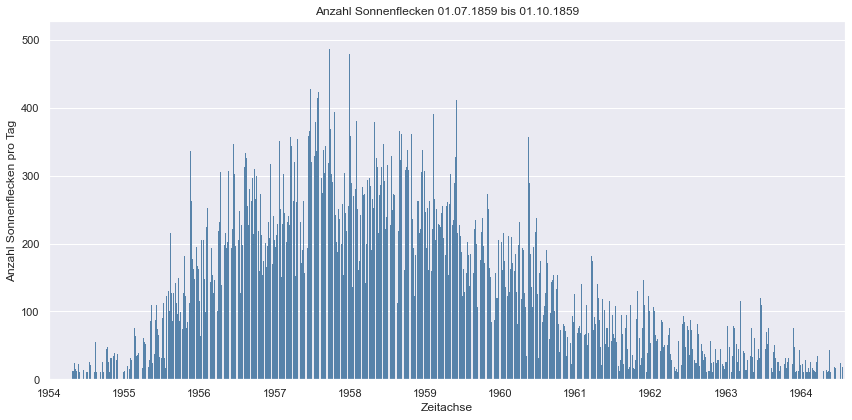

In [22]:
# Anzeigen der Daten im Sonnenzyklus 19 (April 1954 bis Oktober 1964)
# Quelle: https://de.wikibrief.org/wiki/Solar_cycle_19

# Erstellung neues Dataframe für den Zeitraum 01.07.1859 - 01.10.1859
df_sz19 = df[(df.date > '1954-04-01') & (df.date < '1964-11-01')][['date','sunspots']]
df_sz19.set_index('date', inplace=True)

# Erstellung eines Barplots für das Datafram df_1859
plt.figure(figsize=(12, 6), tight_layout=True)
ax = sns.barplot(x=df_sz19.index, y=df_sz19['sunspots'], color='#4984b8', lw=0.)

# Beschriftung der X-Achse anpassen
ticklabels = ['']*len(df_sz19.index)
ticklabels[::365] = [item.strftime('%Y') for item in df_sz19.index[::365]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

# Labels und Titel definieren
ax.set(title='Anzahl Sonnenflecken 01.07.1859 bis 01.10.1859', xlabel='Zeitachse', ylabel='Anzahl Sonnenflecken pro Tag')

plt.show()

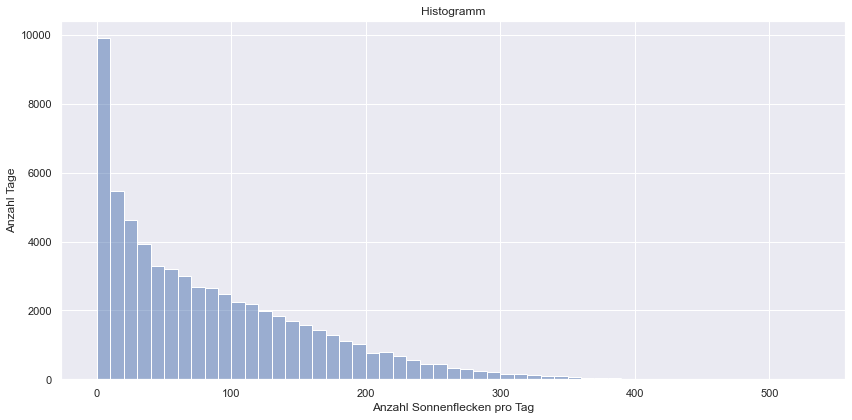

In [23]:
# Referenz: P003

# create a histogram
plt.figure(figsize=(12, 6), tight_layout=True)

# die Breite von 10 wird genommen, damit die Verteilung besser aussieht
ax2 = sns.histplot(data=df_spots, binwidth=10, legend=False)

ax2.set(title='Histogramm', xlabel='Anzahl Sonnenflecken pro Tag', ylabel='Anzahl Tage')

#plt.legend(loc='upper right', labels=['Sonnenflecken'])

plt.show()


# @todo: in welchem Zeitraum? -> pro Tag (evtl wechsle ich noch auf pro Monat)
# --> muss aber unbedingt beschrieben sein! (Man sollte die Grafik verstehen ohne zus. Text)

Die Daten enthalten sehr viele Daten ohne Sonnenflecken. Erklärung:

Während einem Sonnenminimum (solar minimum) ist es normal, dass es Tage ohne Sonnenflecken gibt. Durchschnittlich gibt es während einem Sonnenminimum 485 Tage, an denen die Sonne keine Flecken hat.

Quelle:
https://www.spaceweather.com/glossary/spotlessdays.htm#:~:text=A%20spotless%20day%20is%20a,the%20sun%20is%20very%20quiet

#### QQ-Plot

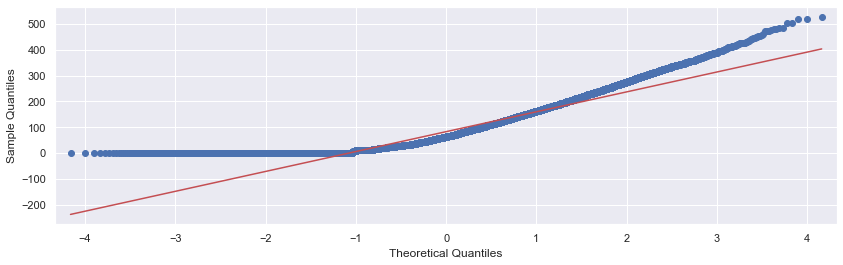

In [24]:
# QQ-Plot
sm.qqplot(df_spots.sunspots, line ='s')
plt.show()

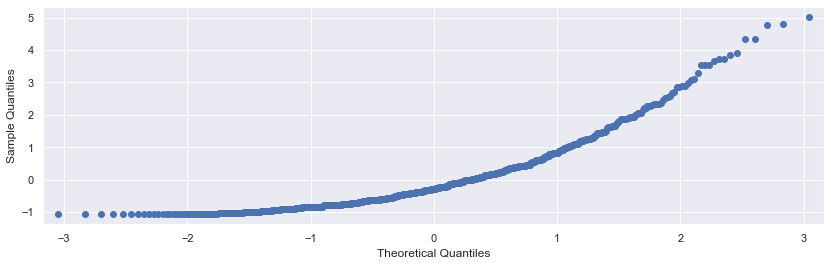

In [25]:
## QQ-Plot

sm.qqplot(df_spots.sunspots[df_spots.sunspots>300], fit=True)
plt.show()

Erkenntnis aus QQ-Plot: ist nicht normalverteilt.